# Data Manipulation

In [6]:
import pandas as pd
import numpy as np
import manipulation_functions as mf

# Load the CSV file
file_path = 'C:\\Users\\USER\\Documents\\GitHub\\project_final\\1_data_cleaning\\data_cleaned.csv'
df_manipulation = pd.read_csv(file_path)

In [7]:
df_manipulation

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [8]:
# Step 2: Calculate 'total_purchase' and identify outliers
df_manipulation['total_purchase'] = df_manipulation['quantity'] * df_manipulation['unitprice']

In [9]:
# Identify outliers in 'total_purchase'
outliers = mf.identify_outliers(df_manipulation, 'total_purchase')
print(f"Number of outliers identified: {len(outliers)}")

Number of outliers identified: 44997


## Visualization Outliers

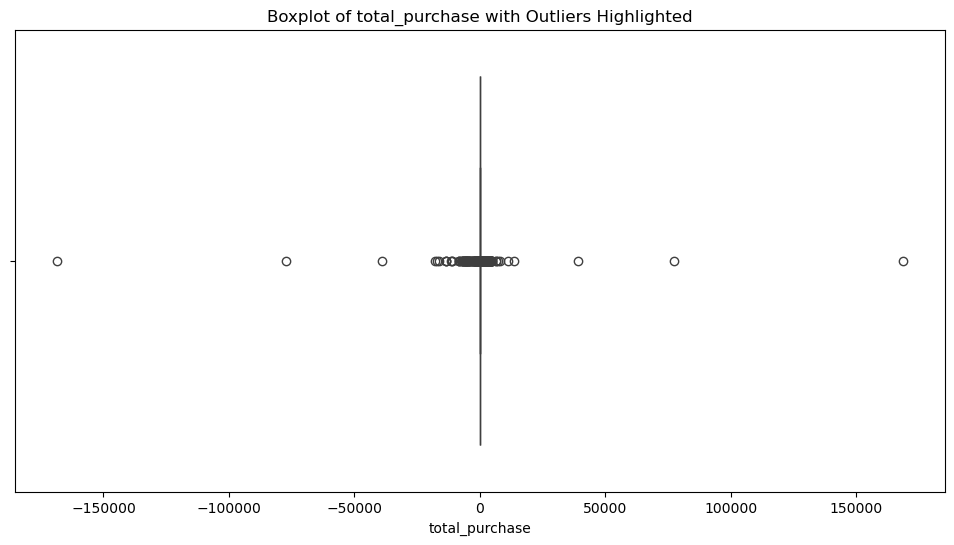

In [10]:
mf.visualize_outliers(df_manipulation, 'total_purchase')

## Cap Outliers

Given the objectives of understanding popular products, seasonal trends, and purchase frequency:

Capping outliers is a better approach. It allows to mitigate the impact of extreme values without losing potentially valuable insights from bulk purchases or high-value customers.

In [11]:
# Step 3: Cap Outliers
df_manipulation = mf.cap_outliers(df_manipulation, 'total_purchase')

## Type Casting

Ensuring that invoicedate is in datetime format and that quantity and unitprice are stored as floats.

In [ ]:
df_manipulation = mf.type_casting(df_manipulation)
print("Type casting completed.")

## Feature Selection

- Purchase Behavior: customerid, description, and total_purchase allow you to analyze purchase frequency and customer spending, which are critical for understanding customer behavior.

- Product Popularity: description, quantity, and total_purchase help identify which products are most popular, providing insights into demand trends.

- Seasonal Trends: invoicedate is key for analyzing when products are most popular and how sales fluctuate throughout the year.

- Revenue Analysis: unitprice and total_purchase allow for in-depth revenue analysis, helping you understand which products contribute most to the bottom line.

- Geographical Insights: If country is available, it can add a layer of geographical analysis to understand regional preferences.

In [ ]:
df_selected = mf.select_features(df_manipulation)
print("Selected features for analysis.")

## Saving Manipulated Data

In [ ]:
mf.save_manipulated_data(df_selected, 'C:\\Users\\USER\\Documents\\GitHub\\project_final\\3_data_manipulation\\data_manipulated.csv')